#Random Forest Classifier Model for Predicting Soil Cover Types in Ohio
Developed by Mohammed Braimah, September 2023

Email: mbraimah@kent.edu

The code processes the field reflectance data.It interpolates the 1nm reflectance to 10nm
 computes derivatives.
 The code builds a random forest algorithms using the GridSearchCV to optimize the hyperparameters


**We first import all the packages we need for the analysis**

In [ ]:


##we are importing operational packages

import pandas as pd
import numpy as np
import pickle
from google.colab import drive
drive.mount('/content/gdrive')

##we are importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

##importing machine learning model packages
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,cohen_kappa_score,top_k_accuracy_score,balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay


from sklearn.ensemble import RandomForestClassifier

from scipy.stats import zscore
# This is the function that helps plot feature importance
from xgboost import plot_importance

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


***We want to load the excel book and call each worksheet.
This saves us time from saving each worksheet seperately as a .csv file***

In [ ]:

ZachA_LynnW = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/042623_HWHF_10d_1_1.xlsx')
ZachA_15_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA_15_Weeds')
ZachA_15_Soil = pd.read_excel(ZachA_LynnW, 'ZachA15_Soil')
ZachA_14_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA_14_Weeds')
ZachA_14_Soil = pd.read_excel(ZachA_LynnW, 'ZachA14_Soil')
ZachA_13_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA13_Weeds')
ZachA_13_Soil = pd.read_excel(ZachA_LynnW, 'ZachA13_10D_Soil')
ZachA_12_Wheat = pd.read_excel(ZachA_LynnW, 'ZachA12_Wheat')
ZachA_12_Road = pd.read_excel(ZachA_LynnW, 'ZachA12_Road')
ZachA_11_Wheat = pd.read_excel(ZachA_LynnW, 'ZackA_11_Wheat')
ZachA_11_Soil = pd.read_excel(ZachA_LynnW, 'ZachA11_Soil')
LynnW05_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW05_Cornres')
LynnW05_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW05_Bare_Soil')
LynnW04_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW04_Cornres')
LynnW04_Soil = pd.read_excel(ZachA_LynnW, '042623LynnW04_Bare_SOil')
LynnW03_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW03_Cornres')
LynnW03_Soil = pd.read_excel(ZachA_LynnW, '042623LynnW_03_Bare_Soil')
LynnW02_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW02_Cornres')
LynnW02_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW02_Bare_Soil')
LynnW01_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW01_Cornres')
LynnW01_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW01_Bare_Soil')

SK_farms = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/052423_HWHF_10d_1.xlsx')
SK_5_Soil = pd.read_excel(SK_farms, '052423_SK_5_Soil')
SK_5_Grass = pd.read_excel(SK_farms, '052423_SK_5_Grass')
SK_4_Soil = pd.read_excel(SK_farms, '052423_SK_4_Soil')
SK_4_Grass = pd.read_excel(SK_farms, '052423_SK_4_Grass')
SK_3_Soil = pd.read_excel(SK_farms, '052423_SK_3_Soil')
SK_3_Grass = pd.read_excel(SK_farms, '052423_SK_3_Grass')
SK_2_Soil = pd.read_excel(SK_farms, '052423_SK_2_Soil')
SK_2_Grass = pd.read_excel(SK_farms, '052423_SK_2_Grass')
SK_1_Soil = pd.read_excel(SK_farms, '052423_SK_1_Soil')
SK_1_Grass = pd.read_excel(SK_farms, '052423_SK_1_Grass')

KB_farms = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/052223_HWHF_10d_1.xlsx')
KB_5_Wheat = pd.read_excel(KB_farms, '52223_KB5_Wheat')
KB_5_Soil = pd.read_excel(KB_farms, '052223_KB5_Soil')
KB_5_Drying_Wheat = pd.read_excel(KB_farms, '052223_KB5_Drying_Wheat')
KB_5_Corn_Res = pd.read_excel(KB_farms, '052223_KB5_Corn_Res')
KB_4_Soil = pd.read_excel(KB_farms, '052223_KB4_Soil')
KB_4_Dry_Rye = pd.read_excel(KB_farms, '052223_KB4_Dry_Rye')
KB_4_Corn_Res = pd.read_excel(KB_farms, '052223_KB4_Corn_Res')
KB_3_Soil = pd.read_excel(KB_farms, '052223_KB3_Soil')
KB_3_Corn_Res = pd.read_excel(KB_farms, '052223_KB_3_Corn_Res')
KB_1_Soil = pd.read_excel(KB_farms, '052223_KB1_Soil')
KB_1_Corn_Res = pd.read_excel(KB_farms, '052223_KB1_Corn_Res')
JB_5_Soil = pd.read_excel(KB_farms, '052223_JB5_Soil')
JB_5_Corn_Res = pd.read_excel(KB_farms, '052223_JB5_Corn_Res')
JB_4_Soil = pd.read_excel(KB_farms, '052223_JB4_Soil')
JB_4_Corn_Res = pd.read_excel(KB_farms, '052223_JB4_CorenRes')
JB_3_Soil = pd.read_excel(KB_farms, '052223_JB3_Soil')
JB_3_Corn_Res = pd.read_excel(KB_farms, '052223_JB3_Corn_Residue')
JB_2_Soil = pd.read_excel(KB_farms, '052223_JB2_Soil')
JB_2_Corn_Res = pd.read_excel(KB_farms, '052223_JB2_Corn_Residue')
JB_1_Soil = pd.read_excel(KB_farms, '052223_JB1_Soil')
JB_1_Corn_Res = pd.read_excel(KB_farms, '052223_JB1_CornRes')
JB_1_Soya_Bean = pd.read_excel(KB_farms, '052223_JB1_Soya_Bean')
JB_Grass_Filt = pd.read_excel(KB_farms, '052223_JB_Grass_Filt')
JB_0_Road = pd.read_excel(KB_farms, '052223_JB0_Road')

JanD_farms = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/041923_HWHF_10d_1_1.xlsx')
JanD_S10_Weeds = pd.read_excel(JanD_farms, '041923_JanDS10_Weeds')
JanD_S9_Weeds = pd.read_excel(JanD_farms, '041923_JanDS09_Weeds')
JanD_S9_Corn_Res = pd.read_excel(JanD_farms, '041923_JanDS09_Cornres')
JanD_S8_Corn_Res = pd.read_excel(JanD_farms, '041923_JanDS08_Cornres')
JanD_S8_Bare_Soil = pd.read_excel(JanD_farms, '041923JanDS08_Baresoil')
JanD_S6_Weed = pd.read_excel(JanD_farms, '041923_JanDS06_Weed')
JanD_S6_Weed_2 = pd.read_excel(JanD_farms, '041923_JanDS06_Weed2')
JanD_S6_Weed_3 = pd.read_excel(JanD_farms, '041923_JanDS06_Weed3')
JanD_S6_Bare_Soil = pd.read_excel(JanD_farms, '041923_JanDS06_Baresoil')
JanD_S6_Corn_Redw = pd.read_excel(JanD_farms, '041923JanDS06_Corn_Redw')



***This function calculates the mean avaerage reflectance of the sample and multiplies it by 100***

In [ ]:


def mean_reflectance (sample):
  sample["Mean Reflectance"] = sample.drop('Wavelength', axis=1).mean(axis=1)*100
  return sample["Mean Reflectance"]

***This function performs the interpolation at 10nm and calculates the derivative spectra***

In [ ]:

def derivative(sample):

  ## we convert the mean reflectance and wavelength at 1nm  to numpy arrays
  Wavelength_np = np.array(sample["Wavelength"])

  #we apply the mean_reflectance function on the sample and convert it to numpy arrays
  Reflectance_np= np.array( mean_reflectance (sample))

  ##we tell python to give us values from 350 t0 2500, in intervals of 10
  xvals = np.array(range(350, 2481, 10))

  ##we are performing the interpolation at 10nm using the intervals, wavelength, and reflecatnace
  interp_10nm = np.interp(xvals,Wavelength_np, Reflectance_np)

  ## we want to claculate the derivative using the gradient function dydx = np.gradient(y,x)

  derivative = np.gradient( interp_10nm , xvals, edge_order=2)

  return derivative

***we want to execute the derivative function on each sample
to get the derivative spectra of each sample***

In [ ]:

SK_5_Soil_derivative = derivative(SK_5_Soil)
SK_5_Grass_derivative = derivative(SK_5_Grass)
SK_4_Soil_derivative = derivative(SK_4_Soil)
SK_4_Grass_derivative = derivative( SK_4_Grass)
SK_3_Soil_derivative = derivative(SK_3_Soil)
SK_3_Grass_derivative = derivative(SK_3_Grass)
SK_2_Soil_derivative = derivative(SK_2_Soil)
SK_2_Grass_derivative = derivative(SK_2_Grass)
SK_1_Soil_derivative = derivative (SK_1_Soil)
SK_1_Grass_derivative = derivative (SK_1_Grass)

KB_5_Soil_derivative = derivative (KB_5_Soil)
KB_5_Wheat_derivative = derivative (KB_5_Wheat)
KB_5_Drying_Wheat_derivative = derivative(KB_5_Drying_Wheat)
KB_5_Corn_Res_derivative = derivative(KB_5_Corn_Res)
KB_4_Dry_Rye_derivative = derivative (KB_4_Dry_Rye)
KB_4_Soil_derivative = derivative (KB_4_Soil)
KB_3_Corn_Res_derivative = derivative (KB_3_Corn_Res)
KB_3_Soil_derivative = derivative (KB_3_Soil)
KB_1_Corn_Res_derivative = derivative (KB_1_Corn_Res)
KB_1_Soil_derivative = derivative (KB_1_Soil)

JB_5_Soil_derivative = derivative(JB_5_Soil)
JB_5_Corn_Res_derivative = derivative(JB_5_Corn_Res)
JB_4_Soil_derivative = derivative (JB_4_Soil)
JB_4_Corn_Res_derivative = derivative (JB_4_Corn_Res)
JB_3_Soil_derivative = derivative (JB_3_Soil)
JB_3_Corn_Res_derivative = derivative (JB_3_Corn_Res)
JB_2_Soil_derivative = derivative (JB_2_Soil)
JB_2_Corn_Res_derivative = derivative (JB_2_Corn_Res)
JB_1_Soil_derivative = derivative (JB_1_Soil)
JB_1_Corn_Res_derivative = derivative (JB_1_Corn_Res)
JB_1_Soya_Bean_derivative = derivative (JB_1_Soya_Bean)
JB_0_Road_derivative = derivative (JB_0_Road)
JB_Grass_Filt_derivative = derivative (JB_Grass_Filt)

JanD_S10_Weeds_derivative = derivative(JanD_S10_Weeds)
JanD_S9_Weeds_derivative = derivative(JanD_S9_Weeds)
JanD_S9_Corn_Res_derivative = derivative(JanD_S9_Corn_Res)

JanD_S8_Corn_Res_derivative = derivative (JanD_S8_Corn_Res)
JanD_S8_Bare_Soil_derivative = derivative (JanD_S8_Bare_Soil)
JanD_S6_Weed_derivative = derivative (JanD_S6_Weed)
JanD_S6_Weed_2_derivative = derivative (JanD_S6_Weed_2)
JanD_S6_Weed_3_derivative = derivative (JanD_S6_Weed_3)
JanD_S6_Corn_Rewd_derivative = derivative (JanD_S6_Corn_Redw )

ZachA_15_Weeds_derivative = derivative(ZachA_15_Weeds)
ZachA_15_Soil_derivative = derivative(ZachA_15_Soil)
ZachA_14_Soil_derivative = derivative(ZachA_14_Soil)
ZachA_14_Weeds_derivative = derivative(ZachA_14_Weeds)
ZachA_13_Weeds_derivative = derivative(ZachA_13_Weeds)
ZachA_13_Soil_derivative = derivative (ZachA_13_Soil)
ZachA_12_Wheat_derivative = derivative (ZachA_12_Wheat)
ZachA_12_Road_derivative = derivative (ZachA_12_Road)
ZachA_11_Wheat_derivative = derivative(ZachA_11_Wheat)
ZachA_11_Soil_derivative = derivative(ZachA_11_Soil)


LynnW_05_CornRes_derivative = derivative(LynnW05_CornRes)
LynnW_05_Soil_derivative = derivative (LynnW05_Soil)
LynnW_04_CornRes_derivative = derivative (LynnW04_CornRes)
LynnW_04_Soil_derivative = derivative(LynnW04_Soil)
LynnW_03_CornRes_derivative = derivative(LynnW03_CornRes)
LynnW_03_Soil_derivative = derivative (LynnW03_Soil)
LynnW_02_CornRes_derivative = derivative (LynnW02_CornRes)
LynnW_02_Soil_derivative = derivative(LynnW02_Soil)
LynnW_01_CornRes_derivative = derivative(LynnW01_CornRes)
LynnW_01_Soil_derivative = derivative (LynnW01_Soil)



In [ ]:

xvals_10nm = np.array(range(350, 2481, 10))
derivative_spring_2023 = pd.DataFrame({'Wavelength':xvals_10nm,
                                       'ZachA_15_Weeds_derivative': ZachA_15_Weeds_derivative,
                                       'ZachA_15_Soil_derivative': ZachA_15_Soil_derivative,
                                       'ZachA_14_Weeds_derivative': ZachA_14_Weeds_derivative,
                                       'ZachA_14_Soil_derivative':ZachA_14_Soil_derivative,
                                       'ZachA_13_Weeds_derivative':ZachA_13_Weeds_derivative,
                                       'ZachA_13_Soil_derivative': ZachA_13_Soil_derivative,
                                       'ZachA_12_Wheat_derivative ':ZachA_12_Wheat_derivative ,
                                       'ZachA_12_Road_derivative': ZachA_12_Road_derivative,
                                       'ZachA_11_Wheat_derivative':ZachA_11_Wheat_derivative,
                                       'ZachA_11_Soil_derivative': ZachA_11_Soil_derivative,
                                       'LynnW_05_CornRes_derivative': LynnW_05_CornRes_derivative,
                                       'LynnW_05_Soil_derivative': LynnW_05_Soil_derivative,
                                       'LynnW_04_CornRes_derivative ': LynnW_04_CornRes_derivative ,
                                       'LynnW_04_Soil_derivative ': LynnW_04_Soil_derivative,
                                       'LynnW_03_CornRes_derivative ': LynnW_03_CornRes_derivative,
                                       'LynnW_03_Soil_derivative':LynnW_03_Soil_derivative,
                                       'LynnW_02_CornRes_derivative ': LynnW_02_CornRes_derivative,
                                       'LynnW_02_Soil_derivative':LynnW_02_Soil_derivative,
                                       'LynnW_01_CornRes_derivative ': LynnW_01_CornRes_derivative,
                                       'LynnW_01_Soil_derivative': LynnW_01_Soil_derivative,
                                       'SK_5_Soil_derivative': SK_5_Soil_derivative,
                                       'SK_5_Grass_derivative': SK_5_Grass_derivative,
                                       'SK_4_Soil_derivative ': SK_4_Soil_derivative,
                                       'SK_4_Grass_derivative': SK_4_Grass_derivative,
                                       'SK_3_Soil_derivative' : SK_3_Soil_derivative,
                                       'SK_3_Grass_derivative': SK_3_Grass_derivative,
                                       'SK_2_Soil_derivative': SK_2_Soil_derivative,
                                       'SK_2_Grass_derivative': SK_2_Grass_derivative,
                                       'SK_1_Soil_derivative ':SK_1_Soil_derivative,
                                       'SK_1_Grass_derivative': SK_1_Grass_derivative,
                                       'KB_5_Soil_derivative':  KB_5_Soil_derivative,
                                       'KB_5_Wheat_derivative': KB_5_Wheat_derivative,
                                       'KB_5_Drying_Wheat_derivative': KB_5_Drying_Wheat_derivative,
                                       'KB_5_Corn_Res_derivative ': KB_5_Corn_Res_derivative,
                                       'KB_4_Dry_Rye_derivative': KB_4_Dry_Rye_derivative,
                                       'KB_4_Soil_derivative': KB_4_Soil_derivative,
                                       'KB_3_Corn_Res_derivative ': KB_3_Corn_Res_derivative,
                                       'KB_3_Soil_derivative': KB_3_Soil_derivative,
                                       'KB_1_Corn_Res_derivative' : KB_1_Corn_Res_derivative,
                                       'KB_1_Soil_derivative': KB_1_Soil_derivative,
                                       'JB_5_Soil_derivative': JB_5_Soil_derivative,
                                       'JB_5_Corn_Res_derivative': JB_5_Corn_Res_derivative,
                                       'JB_4_Soil_derivative': JB_4_Soil_derivative,
                                       'JB_4_Corn_Res_derivative': JB_4_Corn_Res_derivative,
                                       'JB_3_Soil_derivative': JB_3_Soil_derivative,
                                       'JB_3_Corn_Res_derivative': JB_3_Corn_Res_derivative,
                                       'JB_2_Soil_derivative': JB_2_Soil_derivative,
                                       'JB_2_Corn_Res_derivative': JB_2_Corn_Res_derivative,
                                       'JB_1_Soil_derivative': JB_1_Soil_derivative,
                                       'JB_1_Corn_Res_derivative': JB_1_Corn_Res_derivative,
                                       'JB_1_Soya_Bean_derivative': JB_1_Soya_Bean_derivative,
                                       'JB_0_Road_derivative': JB_0_Road_derivative,
                                       'JB_Grass_Filt_derivative': JB_Grass_Filt_derivative,
                                       'JanD_S10_Weeds_derivative': JanD_S10_Weeds_derivative,
                                       'JanD_S9_Weeds_derivative': JanD_S9_Weeds_derivative,
                                       'JanD_S9_Corn_Res_derivative': JanD_S9_Corn_Res_derivative,
                                       'JanD_S8_Corn_Res_derivative': JanD_S8_Corn_Res_derivative,
                                       'JanD_S8_Bare_Soil_derivative': JanD_S8_Bare_Soil_derivative,
                                       'JanD_S6_Weed_derivative': JanD_S6_Weed_derivative,
                                       'JanD_S6_Weed_2_derivative ': JanD_S6_Weed_2_derivative,
                                       'JanD_S6_Weed_3_derivative ': JanD_S6_Weed_3_derivative,
                                       'JanD_S6_Corn_Rewd_derivative': JanD_S6_Corn_Rewd_derivative
                                       } )
derivative_spring_2023

,Wavelength,ZachA_15_Weeds_derivative,ZachA_15_Soil_derivative,ZachA_14_Weeds_derivative,ZachA_14_Soil_derivative,ZachA_13_Weeds_derivative,ZachA_13_Soil_derivative,ZachA_12_Wheat_derivative,ZachA_12_Road_derivative,ZachA_11_Wheat_derivative,...,JB_Grass_Filt_derivative,JanD_S10_Weeds_derivative,JanD_S9_Weeds_derivative,JanD_S9_Corn_Res_derivative,JanD_S8_Corn_Res_derivative,JanD_S8_Bare_Soil_derivative,JanD_S6_Weed_derivative,JanD_S6_Weed_2_derivative,JanD_S6_Weed_3_derivative,JanD_S6_Corn_Rewd_derivative
0,350,-0.003259,0.008077,0.000489,0.006545,-0.006032,-0.003312,-0.003193,-0.002520,-0.338267,...,0.001046,0.000355,-0.002034,0.015397,0.018182,0.006227,0.000077,0.004501,-0.003099,0.027407
1,360,0.001130,0.016511,-0.000905,0.009922,0.001336,0.005548,-0.004304,-0.003252,0.010595,...,0.000655,-0.000114,-0.001922,0.015835,0.025630,0.011087,0.004254,0.005968,-0.001938,0.027469
2,370,0.007323,0.029494,0.003313,0.021173,0.007999,0.016265,-0.001632,-0.000358,-0.030939,...,0.001270,0.002433,0.000505,0.021610,0.036030,0.017038,0.009517,0.010643,0.000945,0.036500
3,380,0.015395,0.046133,0.012361,0.037760,0.015365,0.027891,0.003418,0.006733,-0.431450,...,0.002999,0.007773,0.005321,0.033741,0.049793,0.024446,0.017354,0.018288,0.005951,0.053000
4,390,0.023278,0.053879,0.017802,0.042840,0.022536,0.033465,0.006135,0.012706,-0.586099,...,0.006464,0.011775,0.009192,0.044052,0.062290,0.029088,0.024874,0.024842,0.010057,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2440,-0.045488,-0.071400,-0.030671,-0.045229,-0.023762,-0.057586,-0.024806,-0.028216,0.084701,...,-0.026978,-0.026843,-0.021863,-0.096695,-0.138735,-0.082340,-0.064950,-0.072493,-0.039596,-0.127756
210,2450,-0.063048,-0.077826,-0.029581,-0.038660,-0.049073,-0.033960,-0.021516,-0.024023,0.047428,...,-0.022978,-0.031104,-0.018241,-0.095077,-0.128914,-0.065462,-0.062843,-0.064195,-0.038473,-0.128140
211,2460,-0.065021,-0.070519,-0.032804,-0.037313,-0.092935,-0.067525,-0.026986,-0.027005,-0.325939,...,-0.037868,-0.034845,-0.019335,-0.080030,-0.110603,-0.057924,-0.053971,-0.047805,-0.029418,-0.111571
212,2470,0.008473,-0.069072,-0.033771,-0.033027,-0.038743,-0.110998,-0.030243,-0.033645,0.002257,...,-0.062290,-0.030450,-0.017065,-0.069367,-0.125050,-0.068264,-0.041711,-0.046988,-0.017096,-0.072860


***This code renames all the columns into the soil cover classes based on the main sample measured ***

In [ ]:
derivative_rename =derivative_spring_2023.rename(columns = {
                                      'ZachA_15_Weeds_derivative': 'Weeds',
                                       'ZachA_15_Soil_derivative':'Soil',
                                        'ZachA_14_Weeds_derivative': 'Weeds',
                                        'ZachA_14_Soil_derivative': 'Soil',
                                       'ZachA_13_Weeds_derivative': 'Weeds',
                                        'ZachA_13_Soil_derivative': 'Soil',
                                       'ZachA_12_Wheat_derivative ': 'Wheat',
                                       'ZachA_12_Road_derivative':'Soil',
                                       'ZachA_11_Wheat_derivative': 'Wheat',
                                       'ZachA_11_Soil_derivative': 'Soil',
                                       'LynnW_05_CornRes_derivative': 'CornRes',
                                       'LynnW_05_Soil_derivative': 'Soil',
                                       'LynnW_04_CornRes_derivative ':'CornRes',
                                       'LynnW_04_Soil_derivative ': 'Soil',
                                       'LynnW_03_CornRes_derivative ': 'CornRes',
                                      'LynnW_03_Soil_derivative': 'Soil',
                                       'LynnW_02_CornRes_derivative ': 'CornRes',
                                       'LynnW_02_Soil_derivative':'Soil',
                                       'LynnW_01_CornRes_derivative ': 'CornRes',
                                       'LynnW_01_Soil_derivative': 'Soil',
                                       'SK_5_Soil_derivative': 'Soil',
                                       'SK_5_Grass_derivative': 'Grass',
                                       'SK_4_Soil_derivative ': 'Soil',
                                       'SK_4_Grass_derivative': 'Grass',
                                       'SK_3_Soil_derivative':'Soil',
                                       'SK_3_Grass_derivative': 'Grass',
                                       'SK_2_Soil_derivative': 'Soil',
                                       'SK_2_Grass_derivative':'Grass',
                                      'SK_1_Soil_derivative ':'Soil',
                                       'SK_1_Grass_derivative': 'Grass',
                                       'KB_5_Soil_derivative': 'Soil',
                                       'KB_5_Wheat_derivative':'Wheat',
                                       'KB_5_Drying_Wheat_derivative': 'Wheat',
                                       'KB_5_Corn_Res_derivative ': 'CornRes',
                                       'KB_4_Dry_Rye_derivative': 'Weeds',
                                       'KB_4_Soil_derivative': 'Soil',
                                       'KB_3_Corn_Res_derivative ':'CornRes',
                                       'KB_3_Soil_derivative': 'Soil',
                                       'KB_1_Corn_Res_derivative': 'CornRes',
                                       'KB_1_Soil_derivative': 'Soil',
                                       'JB_5_Soil_derivative': 'Soil',
                                       'JB_5_Corn_Res_derivative': 'CornRes',
                                       'JB_4_Soil_derivative': 'Soil',
                                       'JB_4_Corn_Res_derivative': 'CornRes',
                                       'JB_3_Soil_derivative': 'Soil',
                                       'JB_3_Corn_Res_derivative': 'CornRes',
                                       'JB_2_Soil_derivative': 'Soil',
                                       'JB_2_Corn_Res_derivative':'CornRes',
                                       'JB_1_Soil_derivative': 'Soil',
                                       'JB_1_Corn_Res_derivative': 'CornRes',
                                       'JB_1_Soya_Bean_derivative': 'Soil',
                                       'JB_0_Road_derivative': 'Grass',
                                       'JB_Grass_Filt_derivative': 'Grass',
                                       'JanD_S10_Weeds_derivative':'Weeds',
                                      'JanD_S9_Weeds_derivative': 'Weeds',
                                       'JanD_S9_Corn_Res_derivative':'CornRes',
                                       'JanD_S8_Corn_Res_derivative': 'CornRes',
                                       'JanD_S8_Bare_Soil_derivative': 'Soil',
                                       'JanD_S6_Weed_derivative': 'Weeds',
                                       'JanD_S6_Weed_2_derivative ': 'Weeds',
                                       'JanD_S6_Weed_3_derivative ': 'Weeds',
                                       'JanD_S6_Corn_Rewd_derivative': 'CornRes'})



In [ ]:
derivative_rename

,Wavelength,Weeds,Soil,Weeds,Soil,Weeds,Soil,Wheat,Soil,Wheat,...,Grass,Weeds,Weeds,CornRes,CornRes,Soil,Weeds,Weeds,Weeds,CornRes
0,350,-0.003259,0.008077,0.000489,0.006545,-0.006032,-0.003312,-0.003193,-0.002520,-0.338267,...,0.001046,0.000355,-0.002034,0.015397,0.018182,0.006227,0.000077,0.004501,-0.003099,0.027407
1,360,0.001130,0.016511,-0.000905,0.009922,0.001336,0.005548,-0.004304,-0.003252,0.010595,...,0.000655,-0.000114,-0.001922,0.015835,0.025630,0.011087,0.004254,0.005968,-0.001938,0.027469
2,370,0.007323,0.029494,0.003313,0.021173,0.007999,0.016265,-0.001632,-0.000358,-0.030939,...,0.001270,0.002433,0.000505,0.021610,0.036030,0.017038,0.009517,0.010643,0.000945,0.036500
3,380,0.015395,0.046133,0.012361,0.037760,0.015365,0.027891,0.003418,0.006733,-0.431450,...,0.002999,0.007773,0.005321,0.033741,0.049793,0.024446,0.017354,0.018288,0.005951,0.053000
4,390,0.023278,0.053879,0.017802,0.042840,0.022536,0.033465,0.006135,0.012706,-0.586099,...,0.006464,0.011775,0.009192,0.044052,0.062290,0.029088,0.024874,0.024842,0.010057,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2440,-0.045488,-0.071400,-0.030671,-0.045229,-0.023762,-0.057586,-0.024806,-0.028216,0.084701,...,-0.026978,-0.026843,-0.021863,-0.096695,-0.138735,-0.082340,-0.064950,-0.072493,-0.039596,-0.127756
210,2450,-0.063048,-0.077826,-0.029581,-0.038660,-0.049073,-0.033960,-0.021516,-0.024023,0.047428,...,-0.022978,-0.031104,-0.018241,-0.095077,-0.128914,-0.065462,-0.062843,-0.064195,-0.038473,-0.128140
211,2460,-0.065021,-0.070519,-0.032804,-0.037313,-0.092935,-0.067525,-0.026986,-0.027005,-0.325939,...,-0.037868,-0.034845,-0.019335,-0.080030,-0.110603,-0.057924,-0.053971,-0.047805,-0.029418,-0.111571
212,2470,0.008473,-0.069072,-0.033771,-0.033027,-0.038743,-0.110998,-0.030243,-0.033645,0.002257,...,-0.062290,-0.030450,-0.017065,-0.069367,-0.125050,-0.068264,-0.041711,-0.046988,-0.017096,-0.072860


***We want to Transpose the Data***

In [ ]:
''' we want to add drdl to the wavelength to make it a string
'''
derivative_rename['Wavelength'] = 'drdl' + derivative_rename['Wavelength']. astype (str)



**We want to select only the visible spectrum for the analysis: 400nm to 700nm**



In [ ]:
''' we want to select the visible spectrum 400nm to 750nm
'''
derivative_spring_2023_visible = derivative_rename[5:36]

In [ ]:
''' we transpose the visible spectra'''
visible_Transpose = derivative_spring_2023_visible.T

In [ ]:
#set column names equal to values in row index position 0
visible_Transpose.columns = visible_Transpose.iloc[0]

#remove first row from DataFrame
visible_Transpose = visible_Transpose[1:]
visible_Transpose = visible_Transpose.rename_axis('Label').reset_index()

visible_Transpose

Wavelength,Label,drdl400,drdl410,drdl420,drdl430,drdl440,drdl450,drdl460,drdl470,drdl480,...,drdl610,drdl620,drdl630,drdl640,drdl650,drdl660,drdl670,drdl680,drdl690,drdl700
0,Weeds,0.033142,0.049315,0.060517,0.053286,0.036665,0.021573,0.012216,0.010139,0.013711,...,-0.024147,-0.017276,-0.007222,-0.022405,-0.024941,-0.017629,-0.005724,0.04769,0.210091,0.388365
1,Soil,0.050415,0.052549,0.063444,0.070526,0.061641,0.039523,0.026286,0.029699,0.045046,...,0.024911,0.024603,0.029889,0.03278,0.032731,0.031336,0.029304,0.031362,0.038502,0.045218
2,Weeds,0.025602,0.041659,0.049392,0.039808,0.024979,0.013688,0.008778,0.008526,0.012041,...,-0.006839,-0.002195,0.002565,-0.007853,-0.010182,-0.006959,0.000286,0.036966,0.135667,0.229316
3,Soil,0.039731,0.043123,0.053473,0.061577,0.055165,0.035824,0.023408,0.02654,0.041049,...,0.028116,0.028914,0.032015,0.03349,0.033264,0.033151,0.032658,0.033153,0.037331,0.040565
4,Weeds,0.027663,0.036921,0.044197,0.040209,0.030056,0.018493,0.010738,0.010153,0.014788,...,-0.017718,-0.010961,-0.003277,-0.019186,-0.022618,-0.018272,-0.005731,0.054166,0.210329,0.359771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Soil,0.030582,0.034131,0.038121,0.039989,0.0391,0.034807,0.031581,0.031667,0.034165,...,0.037152,0.039562,0.041385,0.041024,0.038807,0.034554,0.035396,0.04773,0.055368,0.049067
58,Weeds,0.029373,0.032634,0.032274,0.026862,0.023949,0.022855,0.019275,0.017458,0.0191,...,-0.015659,-0.007368,-0.002975,-0.025267,-0.02797,-0.022744,-0.009456,0.065115,0.250321,0.410869
59,Weeds,0.031137,0.039217,0.042919,0.038704,0.036005,0.033885,0.027942,0.024916,0.029767,...,-0.023063,-0.011331,-0.007209,-0.047582,-0.052609,-0.044539,-0.023505,0.111822,0.402615,0.607601
60,Weeds,0.01536,0.024278,0.031338,0.030895,0.027547,0.02195,0.012787,0.00887,0.01156,...,-0.038461,-0.026611,-0.018036,-0.050011,-0.055211,-0.046223,-0.025175,0.082323,0.366737,0.675439


#MODELLING ALERT: WE ARE BEGINING THE RF MODELLING PROCESS FROM NOW

**We are going to assign the reflectance data to X and the labels to y**

In [ ]:
y = visible_Transpose['Label']
X = visible_Transpose.drop('Label', axis = 1)
X= X.astype(float)

**We are going to Split the Data into Test and Training Sets. We will use the validation data during the optimization processses**

In [ ]:
# Separate into train, validate, test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.40, random_state = 42)
X_tr,X_validate, y_tr, y_validate = train_test_split(X_train, y_train, test_size = 0.40, random_state =42)

**We want to determine the best set of hyperparameters We are going to state our preferred list of parameters that should be optimized by GridSearchCV**

In [ ]:
# Determine set of grid parameters
cv_params = {'n_estimators' : [50,100, 150],
              'max_depth' : [10,50, None],
              'min_samples_leaf' : [0.5,1],
              'min_samples_split' : [0.002, 0.02, 2],
              'max_features' : ["sqrt", 'auto', 'log2'],
              'max_samples' : [.5,.9 ],
              'criterion' :['gini', 'entropy', 'log_loss'],
             'class_weight':['balanced', 'balanced_subsample']
             }


In [ ]:
# Create list of split indices.

split_index = [0 if x in X_validate.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

**We are building our routine RF model**

In [ ]:
RF = RandomForestClassifier(random_state= 42)

**Now we search over the specified parameters with the routine model included**

In [ ]:
# Search over specified parameters.

rf_val = GridSearchCV(RF, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

**We now fit the model to the training data**

In [ ]:
%%time

# Fit the model.
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 1944 candidates, totalling 1944 fits
CPU times: user 8.26 s, sys: 898 ms, total: 9.16 s
Wall time: 6min


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, -1, -1,  0, -1,  0, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,
        0, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0, -1, -1,  0, -1,
       -1,  0, -1])),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 50, None],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.002, 0.02, 2],
                         'n_estimators': [50, 100, 150]},
             refit='f1', verbose=1)

**Now, we can go ahead and extract the optimal hyperparaters**

In [ ]:
# Obtain optimal parameters.

rf_val.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.002,
 'n_estimators': 150}

**Knowing the optimal hyperparameters, we reconstruct the model using the

optimal parameters**

In [ ]:
# We sse optimal parameters to construct the model.


Rf_optimized = RandomForestClassifier(n_estimators = 50, max_depth = 10,
                                min_samples_leaf = 1, min_samples_split = 0.002,
                                max_features="sqrt", max_samples = 0.9, class_weight = 'balanced',  random_state = 42)

In [ ]:
#Fitting the optimized hyperparameters to the data set
Rf_optimized.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_samples=0.9,
                       min_samples_split=0.002, n_estimators=50,
                       random_state=42)

In [ ]:
y_predict = Rf_optimized.predict( X_test)

In [ ]:
y_predict

array(['Soil', 'CornRes', 'Weeds', 'Soil', 'Soil', 'Soil', 'Soil',
       'CornRes', 'Grass', 'Weeds', 'Soil', 'Soil', 'CornRes', 'Soil',
       'CornRes', 'Soil', 'Soil', 'Soil', 'Soil', 'Soil', 'Soil', 'Grass',
       'Weeds', 'Soil', 'Soil'], dtype=object)

#Here, we want to visualize a sample of the decision trees in the RF model

In [ ]:
%config InlineBackend.figure_format='retina'
estimator = Rf_optimized .estimators_[30]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = X.columns,
                rounded = True, proportion = False,
                precision = 2, filled = True)

In [ ]:
%config InlineBackend.figure_format='retina'
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

#Now, we come to asses the performance of the entire RF Classifier Model

In [ ]:
# Get precision score.

pc_test = precision_score(y_test, y_predict, average = None,  labels = ["Weeds"])
print ("Precision Score of Weeds is " + str(pc_test))
pc_test = precision_score(y_test, y_predict, average = None,  labels = ["Soil"])
print ("Precision Score Soil is " + str(pc_test))
pc_test = precision_score(y_test, y_predict, average = None,  labels = ["Grass"])
print ("Precision Score Grass is " + str(pc_test))
pc_test = precision_score(y_test, y_predict, average = None,  labels = ["CornRes"])
print ("Precision Score Corn Residue is " + str(pc_test))
pc_test = precision_score(y_test, y_predict, average = None,  labels = ["Wheat"])
print ("Precision Score Wheat is " + str(pc_test))

Precision Score of Weeds is [1.]
Precision Score Soil is [0.625]
Precision Score Grass is [0.5]
Precision Score Corn Residue is [1.]
Precision Score Wheat is [0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Get recall test score
rc_test = recall_score(y_test,  y_predict, average = None,  labels = ["Weeds"])
print ("Recall Score Weeds is " + str(rc_test))
rc_test = recall_score(y_test,  y_predict, average = None,  labels = ["Soil"])
print ("Recall Score Soil is " + str(rc_test))
rc_test = recall_score(y_test,  y_predict, average = None,  labels = ["Grass"])
print ("Recall Score Grass is " + str(rc_test))
rc_test = recall_score(y_test,  y_predict, average = None,  labels = ["CornRes"])
print ("Recall Score Corn Residue is " + str(rc_test))
rc_test = recall_score(y_test,  y_predict, average = None,  labels = ["Wheat"])
print ("Recall Score Wheat is " + str(rc_test))

Recall Score Weeds is [0.6]
Recall Score Soil is [1.]
Recall Score Grass is [1.]
Recall Score Corn Residue is [0.66666667]
Recall Score Wheat is [0.]


In [ ]:
# Get accuracy test score
ac_test = accuracy_score(y_test, y_predict)
print ("Acuracy Score is " + str(ac_test))

Acuracy Score is 0.72


In [ ]:
# Get rf1 test score
f1_test = f1_score(y_test, y_predict, average = None,  labels = ["Weeds"])
print ("f1 Score is " + str(f1_test))
f1_test = f1_score(y_test, y_predict, average = None,  labels = ["Soil"])
print ("f1 Score Soil is " + str(f1_test))

f1_test = f1_score(y_test, y_predict, average = None,  labels = ["Grass"])
print ("f1 Score Grass is " + str(f1_test))
f1_test = f1_score(y_test, y_predict, average = None,  labels = ["CornRes"])
print ("f1 Score Corn Residue is " + str(f1_test))
f1_test = f1_score(y_test, y_predict, average = None,  labels = ["Wheat"])
print ("f1 Score Wheat is " + str(f1_test))




f1 Score is [0.75]
f1 Score Soil is [0.76923077]
f1 Score Grass is [0.66666667]
f1 Score Corn Residue is [0.8]
f1 Score Wheat is [0.]


#Confusion Matrix of the RF Classifier

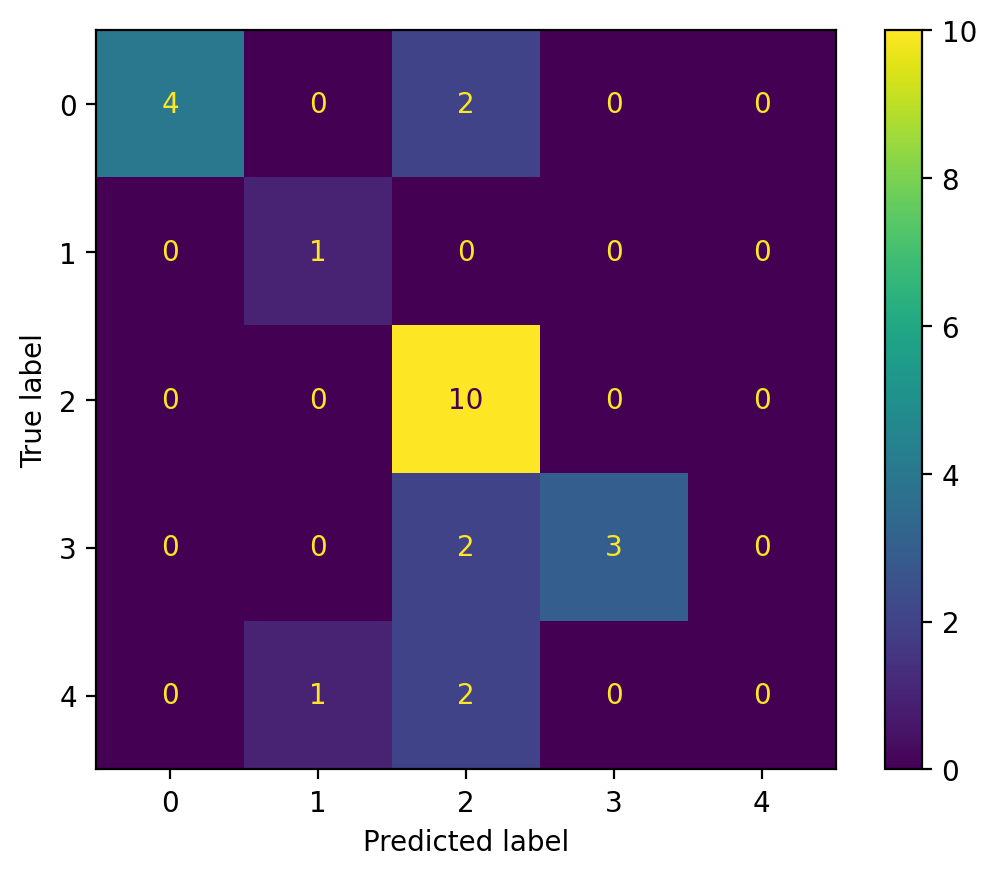

In [ ]:
%config InlineBackend.figure_format='retina'
cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
cohen_kappa = cohen_kappa_score(y_test, y_predict, sample_weight=None)
print ("cohen_kappa_score is " + str(cohen_kappa))

cohen_kappa_score is 0.5872641509433962


In [ ]:
balanced_accuracy = balanced_accuracy_score(y_test, y_predict, sample_weight=None)
print ("balanced_accuracy_score is " + str(balanced_accuracy))

balanced_accuracy_score is 0.6533333333333333


#SUMMARY REPORT
The Random Forest Classifier model constructed to predict soil cover classes by using optimized hyperparameters produced by  GridsearchCV classified the data with an accuracy of 68%. Since Accuary cannot be the only validation factor of the model, we calculated other assessment scores. We had a 75% f1 test score, precsion score of 100%, and recall score of 60% for weeds. Soil had recall soil of 78%, precision of 69%, and recall of 90%. Corn Residue had f1 of 73%,
 precision of 80%, and recall of 67%. Grass had f1 of 40%, 25% for precision, and recall of 100%. Wheat on the other hand generated 0% for precision, recall, and f1. Generally, the model performace was very good for predicting soil, weeds, and corn resisue. The model perfromance was lower in predicting grass and Wheat.

 Thanks, Mohammed